## Imprtations needed

In [31]:
!pip install xgboost

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA     # Dimensionality Reduction: PCA
from sklearn.cluster import KMeans        # Clustering: K-Means
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import timeit

# Regression metrics
from sklearn.metrics import mean_squared_error

from sklearn.metrics import accuracy_score, f1_score

## Loading dataset

In [33]:
data = pd.read_csv("housing.csv")
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [34]:
data.drop(columns=set(data.columns) - set(['MedInc', 'Latitude', 'Longitude']), inplace=True)
data.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [35]:
X_train, X_test = train_test_split(data, random_state=42, test_size=0.2)

In [36]:
model = KMeans(n_clusters=6)

In [37]:
model.fit(X_train)

# Number of Clusters
print('\nDefault number of Clusters : ',model.n_clusters)

print('\nList of Labels : ',model.labels_)

y_train = model.labels_

X_train['cluster'] = y_train

X_train.head()


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Default number of Clusters :  6

List of Labels :  [4 4 3 ... 4 2 5]


,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,4
8267,3.8125,33.77,-118.16,4
17445,4.1563,34.66,-120.48,3
14265,1.9425,32.69,-117.11,4
2271,3.5542,36.78,-119.80,3


In [38]:
# predict the target on the test dataset
predict_test = model.predict(X_test)
print('Clusters on test data',predict_test)

X_test['cluster'] = predict_test

X_test.head()

Clusters on test data [3 3 5 ... 2 3 4]


,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,1
9814,3.7250,36.62,-121.93,5


## Plotting the clusters

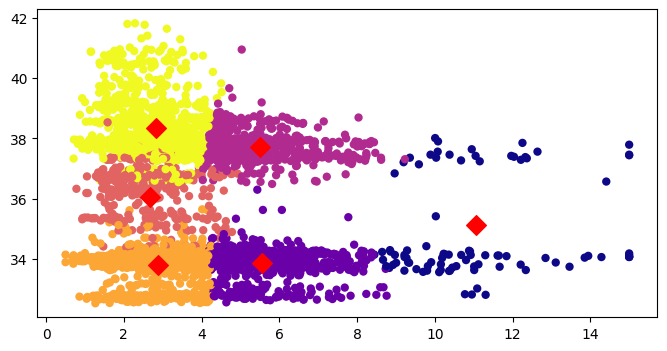

In [39]:
def plot_clustering(data, clusters, include_centroids = False, centroids = None):

    K_ = len(set(clusters))

    plt.figure(figsize=(8,4))
    plt.scatter(data[:,0], data[:,1], c=clusters, cmap="plasma", linewidths=0)

    if include_centroids:
        for k in range(K_):
            plt.scatter(centroids[k,0], centroids[k, 1], s=100, marker='D', color='red')

    plt.show()


plot_clustering(X_test.values, predict_test, include_centroids=True, centroids=model.cluster_centers_)


## PCA

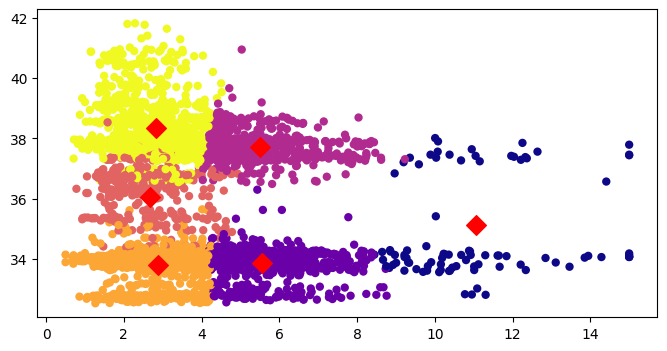

In [40]:
model_pca = PCA(n_components=2)

new_train = model_pca.fit_transform(X_train.drop(columns=['cluster']))
new_test  = model_pca.fit_transform(X_test.drop(columns=['cluster']))

plot_clustering(X_test.values, predict_test, include_centroids=True, centroids=model.cluster_centers_)

## Model Testing

In [66]:
lr = LogisticRegression(multi_class='multinomial')
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_jobs = 2)
svm = SVC()
knn = KNeighborsClassifier(n_neighbors = 10)
gbm = GradientBoostingClassifier(n_estimators=100, max_depth=5)
xgboost = xgb.XGBClassifier(objective="binary:logistic", learning_rate = 0.1, max_depth = 5, n_estimators = 100)

In [67]:
list(X_train['cluster'])

[4,
 4,
 3,
 4,
 3,
 2,
 4,
 2,
 4,
 1,
 2,
 4,
 3,
 5,
 4,
 4,
 5,
 2,
 1,
 4,
 4,
 2,
 5,
 4,
 5,
 2,
 5,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 1,
 4,
 0,
 4,
 4,
 1,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 2,
 5,
 4,
 4,
 1,
 0,
 4,
 4,
 4,
 4,
 4,
 5,
 3,
 2,
 1,
 4,
 4,
 4,
 1,
 2,
 4,
 4,
 2,
 5,
 5,
 4,
 4,
 4,
 2,
 4,
 5,
 1,
 5,
 2,
 4,
 4,
 4,
 2,
 2,
 4,
 5,
 2,
 1,
 1,
 1,
 4,
 3,
 2,
 1,
 3,
 5,
 4,
 4,
 2,
 5,
 5,
 4,
 2,
 2,
 1,
 4,
 4,
 5,
 5,
 5,
 4,
 2,
 2,
 5,
 1,
 1,
 2,
 4,
 1,
 2,
 3,
 4,
 1,
 5,
 5,
 3,
 1,
 5,
 1,
 1,
 5,
 1,
 4,
 4,
 4,
 2,
 1,
 2,
 5,
 5,
 5,
 1,
 4,
 5,
 5,
 1,
 1,
 1,
 4,
 1,
 1,
 5,
 2,
 4,
 4,
 1,
 1,
 4,
 5,
 5,
 4,
 4,
 4,
 2,
 4,
 2,
 4,
 2,
 4,
 5,
 0,
 5,
 4,
 5,
 3,
 4,
 4,
 2,
 4,
 2,
 2,
 5,
 4,
 2,
 3,
 4,
 5,
 2,
 0,
 3,
 4,
 3,
 5,
 5,
 4,
 2,
 5,
 4,
 1,
 1,
 4,
 1,
 5,
 4,
 4,
 5,
 4,
 3,
 4,
 4,
 4,
 1,
 2,
 1,
 5,
 3,
 4,
 4,
 5,
 2,
 3,
 5,
 3,
 5,
 4,
 3,
 5,
 2,
 1,
 5,
 5,
 2,
 1,
 5,
 1,
 2,
 5,
 4,
 1,
 3,
 4,
 4,
 2,
 2,


In [68]:
start_time = timeit.default_timer()
lr.fit(X_train, list(X_train['cluster']))
print("Training Elapsed time: ", timeit.default_timer() - start_time)

Training Elapsed time:  0.45111776600060693


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
start_time = timeit.default_timer()
dt.fit(X_train, list(X_train['cluster']))
print("Training Elapsed time: ", timeit.default_timer() - start_time)

Training Elapsed time:  0.019741279998925165


In [70]:
start_time = timeit.default_timer()
rf.fit(X_train, list(X_train['cluster']))
print("Training Elapsed time: ", timeit.default_timer() - start_time)

Training Elapsed time:  0.7150712809998367


In [71]:
start_time = timeit.default_timer()
svm.fit(X_train, list(X_train['cluster']))
print("Training Elapsed time: ", timeit.default_timer() - start_time)

Training Elapsed time:  3.6988304419992346


In [72]:
start_time = timeit.default_timer()
knn.fit(X_train, list(X_train['cluster']))
print("Training Elapsed time: ", timeit.default_timer() - start_time)

Training Elapsed time:  0.022548261000338243


In [73]:
start_time = timeit.default_timer()
gbm.fit(X_train, list(X_train['cluster']))
print("Training Elapsed time: ", timeit.default_timer() - start_time)

Training Elapsed time:  11.439000082000348


In [74]:
start_time = timeit.default_timer()
xgboost.fit(X_train, list(X_train['cluster']))
print("Training Elapsed time: ", timeit.default_timer() - start_time)

Training Elapsed time:  0.8341231919985148


In [80]:
models = [lr, dt, rf, svm, knn, gbm, xgboost]

max_f1 = 0
min_gap = 1
best_model = None

for m in models:
    print('\nModel running: ',type(m).__name__.upper())

    predict_train = m.predict(X_train)
    f1_score_train = f1_score(list(X_train['cluster']), predict_train, average='macro')
    print('\nF1_SCORE TRAIN: ',f1_score_train)
    
    predict_test_m = m.predict(X_test)
    f1_score_test = f1_score(list(X_test['cluster']), predict_test_m, average='macro')
    print('\nF1_SCORE TEST: ',f1_score_test)
    print('\nF1_SCORE GAP: ',abs(f1_score_train - f1_score_test))

    if f1_score_test > max_f1:
        if min_gap > abs(f1_score_train - f1_score_test):
            min_gap = abs(f1_score_train - f1_score_test)
            max_f1 = f1_score_test
            best_model = m


Model running:  LOGISTICREGRESSION

F1_SCORE TRAIN:  0.9823784825668631

F1_SCORE TEST:  0.9847112755845587

F1_SCORE GAP:  0.0023327930176956224

Model running:  DECISIONTREECLASSIFIER

F1_SCORE TRAIN:  1.0

F1_SCORE TEST:  1.0

F1_SCORE GAP:  0.0

Model running:  RANDOMFORESTCLASSIFIER

F1_SCORE TRAIN:  1.0

F1_SCORE TEST:  1.0

F1_SCORE GAP:  0.0

Model running:  SVC

F1_SCORE TRAIN:  0.8544172151685161

F1_SCORE TEST:  0.849185670687507

F1_SCORE GAP:  0.005231544481009043

Model running:  KNEIGHBORSCLASSIFIER

F1_SCORE TRAIN:  0.9998724714461852

F1_SCORE TEST:  1.0

F1_SCORE GAP:  0.0001275285538148152

Model running:  GRADIENTBOOSTINGCLASSIFIER

F1_SCORE TRAIN:  1.0

F1_SCORE TEST:  1.0

F1_SCORE GAP:  0.0

Model running:  XGBCLASSIFIER

F1_SCORE TRAIN:  1.0

F1_SCORE TEST:  1.0

F1_SCORE GAP:  0.0


In [79]:
print("\n Best model is: ", type(best_model).__name__)


 Best model is:  DecisionTreeClassifier


It is actually the first model in the loop with a perfect score: there is ~= 4 models that are the same